### 🔍 잼미니의 남성 패션 페르소나 설문 시뮬레이터

안녕하세요! 잼미니가 여러분을 위한 특별한 설문 시뮬레이터를 준비했어요! 📊

- 잼미니 활용 가이드: https://bigbread-1129.notion.site/GDG-StartUP-Lab-1e668dfea1ae80c28feae8bc98b53690

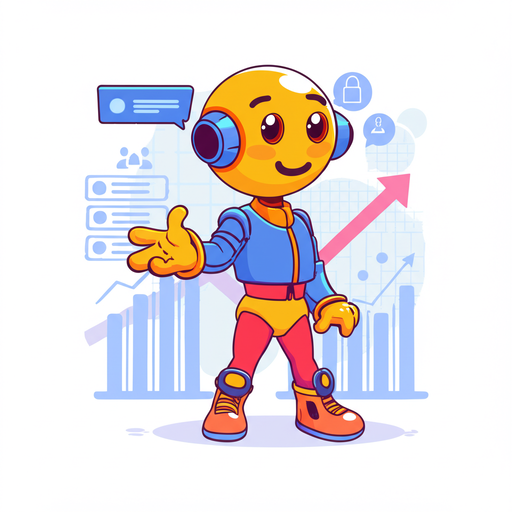

이 노트북에서는 **남성 패션 시장 진출**을 위한 가상의 설문조사를 시뮬레이션할 수 있어요. 최대 100명의 다양한 남성 페르소나에게 여러분이 직접 만든 설문지를 배포하고, 그 결과를 분석해보세요!

### 🚀 이것을 통해 무엇을 할 수 있나요?

- 직접 10개 이상의 객관식/주관식 설문 문항을 제작
- 100명의 가상 남성 페르소나에게 설문 배포
- AI가 각 페르소나의 특성에 맞게 자연스러운 응답 생성
- 설문 결과에 대한 자동 분석 및 요약 리포트 확인
- CSV와 JSON 형태로 데이터 저장 및 활용

### 🧑‍💻 페르소나는 어떻게 구성되어 있나요?

- 20대~40대 다양한 연령층의 남성 소비자
- 다양한 직업군 (IT 개발자, 회사원, 학생, 프리랜서 등)
- 여러 체형과 패션 스타일 (캐주얼, 비즈니스, 스트릿 등)
- 상이한 쇼핑 행태와 예산대
- 각기 다른 패션 관심사와 고민 포인트

### 📝 사용 방법은 간단해요!

1. 아래 코드 셀을 **한 번만** 실행해주세요
2. 설문지 작성 UI가 나타나면 최소 10개 이상의 문항을 작성하세요
3. 객관식과 주관식을 적절히 섞어서 구성하면 더 좋은 인사이트를 얻을 수 있어요
4. 설문 진행할 페르소나 수를 선택하세요 (1~100명)
5. 시뮬레이션이 완료되면 결과 요약과 함께 데이터 파일이 저장됩니다

### 🌟 이런 질문들을 물어보세요!

- 남성들의 쇼핑 행태와 선호 채널
- 의류 구매 시 고려하는 주요 요소들
- 패션 앱/플랫폼에 바라는 기능
- 패션 관련 불편함과 해결 방안
- 의류 쇼핑 시 정보 탐색 경로
- 브랜드 선호도와 그 이유

이제 아래 셀을 실행시켜 설문 시뮬레이션을 시작해보세요! 😊


> **주의사항 1**: 반드시 페르소나 데이터를 다운로드 받아서 코랩 안으로 업로드 해주셔야 설문이 가능합니다!
- 페르소나 데이터: https://drive.google.com/file/d/1SIVTGCD6j30t8UEWjjQigOBFAEAXdt1n/view?usp=sharing

> **주의사항 2**: 셀 실행 후 로딩에 몇 초 정도 소요될 수 있습니다. 기다려주세요!

#### 📊 데이터 시각화를 위한 한글 폰트 설정
- 그래프에 한글이 깨지지 않도록 나눔고딕 폰트를 설치합니다!
- (중복 클릭 ⛔ - 한 번이면 충분해요!)

In [ ]:
# 한글 폰트 설치 및 캐시 갱신
!apt-get install -y fonts-nanum
!fc-cache -fv

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 폰트 설정: NanumGothic 폰트 경로 지정 및 폰트 객체 생성
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

# matplotlib의 기본 폰트를 NanumGothic으로 설정
plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.6 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

#### 🔑 Gemini API 설정하기
- API 키를 설정하고 연결을 테스트합니다. (중복 클릭 ⛔ - 한 번이면 충분해요!)

In [ ]:
from google.colab import files, userdata
from google import genai

# Google API 키 설정 부분
def setup_gemini():
    try:
        # Colab userdata에서 API 키 가져오기
        GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

        if not GOOGLE_API_KEY:
            # userdata에 없는 경우 사용자 입력 요청
            GOOGLE_API_KEY = input("Google API 키를 입력해주세요: ")
            if not GOOGLE_API_KEY:
                print("⚠️ API 키가 필요합니다")

        # 클라이언트 초기화
        global client
        client = genai.Client(api_key=GOOGLE_API_KEY)

        # 간단한 테스트로 API 연결 확인
        try:
            response = client.models.generate_content(
                model="gemini-2.0-flash",
                contents=[{
                    "role": "user",
                    "parts": [{"text": "Hello"}]
                }]
            )
            print("✅ Gemini API 연결 성공!")
        except Exception as e:
            print(f"❌ API 연결 테스트 실패: {e}")

    except Exception as e:
        print(f"❌ Gemini API 설정 실패: {e}")

#### 🔑 Gemini API 설정 확인!
- (중복 클릭 ⛔ - 한 번이면 충분해요!)

In [ ]:
# 함수 호출 추가
setup_gemini()  # 이 줄이 함수를 실행합니다

✅ Gemini API 연결 성공!


### 💫 잼미니가 가상 남성 페르소나 100분에게 설문을 준비하고 있어요!
- 💬 이 셀을 한 번만 실행해주세요! (두 번 클릭하면 중복 실행돼요!)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import json
import re
import time
import random
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from IPython.display import display

# ipywidgets 설치 확인 (필요시 설치)
try:
    import ipywidgets as widgets
except ImportError:
    !pip install ipywidgets -q
    import ipywidgets as widgets

# 1. 페르소나 데이터 로드
def load_personas():
    print("📊 페르소나 데이터를 로드합니다...")

    try:
        # /content/fashion_data.csv에서 데이터 직접 로드
        personas_df = pd.read_csv('/content/fashion_data.csv')

        # 데이터 확인 및 전처리
        required_columns = ['id', 'name', 'age', 'gender', 'height', 'body_type', 'preferred_style',
                           'occupation', 'shopping_frequency', 'monthly_fashion_budget',
                           'online_shopping_experience', 'main_fashion_concerns']

        missing_columns = [col for col in required_columns if col not in personas_df.columns]
        if missing_columns:
            print(f"⚠️ 다음 필수 컬럼이 없습니다: {missing_columns}")
            return None

        print(f"✅ 페르소나 데이터 로드 완료 (총 {len(personas_df)}명)")
        return personas_df

    except Exception as e:
        print(f"❌ 페르소나 데이터 로드 실패! (계속 오류가 발생하면 주변 Organizer or Staff에게 문의해주세요): {e}")
        return None

# 2. UI 개선된 설문지 작성 (문항 삭제 기능 추가)
def create_survey_improved():
    questions = []
    current_question_num = [1]  # 리스트로 감싸서 참조로 사용
    options_list = []  # 현재 문항의 선택지 목록

    # 메인 컨테이너
    main_container = widgets.VBox([])

    # 상단 설명
    header = widgets.HTML(
        value="""
        <h2>📝 설문지 작성</h2>
        <p>객관식 및 주관식 문항을 포함하여 최소 10개 이상 작성해주세요.</p>
        <p>잘못 입력한 문항은 오른쪽 목록에서 삭제 버튼을 눌러 제거할 수 있습니다.</p>
        """
    )

    # 현재 문항 번호 표시
    question_num_label = widgets.HTML(value=f"<h3>Q{current_question_num[0]}</h3>")

    # 문항 유형 선택 버튼
    question_type_group = widgets.ToggleButtons(
        options=['객관식', '주관식'],
        description='문항 유형:',
        button_style='info',
        style={'button_width': '100px'}
    )

    # 질문 텍스트 입력
    question_text = widgets.Text(
        description='질문 내용:',
        placeholder='질문을 입력하세요',
        layout=widgets.Layout(width='80%')
    )

    # 선택지 관리 (객관식용)
    options_container = widgets.VBox([])
    options_label = widgets.HTML(value="<b>선택지 목록:</b>")
    options_display = widgets.HTML(value="<ul><li>아직 선택지가 없습니다.</li></ul>")

    option_input = widgets.Text(
        placeholder='새 선택지 입력',
        layout=widgets.Layout(width='60%')
    )

    add_option_btn = widgets.Button(
        description='선택지 추가',
        button_style='success',
        icon='plus'
    )

    clear_options_btn = widgets.Button(
        description='선택지 초기화',
        button_style='danger',
        icon='trash'
    )

    # 선택지 입력 레이아웃
    option_input_row = widgets.HBox([option_input, add_option_btn, clear_options_btn])

    # 선택지 컨테이너 구성
    options_container.children = [options_label, options_display, option_input_row]

    # 작성된 문항 목록 표시 영역 (추가된 부분)
    created_questions_label = widgets.HTML(value="<h3>작성된 문항 목록</h3>")
    created_questions_display = widgets.HTML(value="<p>아직 작성된 문항이 없습니다.</p>")
    created_questions_container = widgets.VBox([created_questions_label, created_questions_display])

    # 문항 추가 버튼
    add_question_btn = widgets.Button(
        description='문항 추가',
        button_style='primary',
        icon='check',
        layout=widgets.Layout(width='150px')
    )

    # 설문 완료 버튼
    finish_survey_btn = widgets.Button(
        description='설문 작성 완료',
        button_style='warning',
        icon='check-square',
        layout=widgets.Layout(width='150px')
    )

    # 버튼 그룹
    buttons_row = widgets.HBox([add_question_btn, finish_survey_btn])

    # 현재 작성된 문항 수 표시
    questions_count = widgets.HTML(value=f"<p>현재 작성된 문항: 0개 (최소 10개 필요)</p>")

    # 현재 문항 상태 메시지
    status_message = widgets.HTML(value="")

    # 선택지 추가 콜백
    def add_option(b):
        option_text = option_input.value.strip()
        if option_text:
            options_list.append(option_text)
            option_input.value = ""  # 입력 필드 초기화
            update_options_display()

    # 선택지 초기화 콜백
    def clear_options(b):
        options_list.clear()
        update_options_display()

    # 선택지 목록 업데이트 함수
    def update_options_display():
        if not options_list:
            options_display.value = "<ul><li>아직 선택지가 없습니다.</li></ul>"
        else:
            items = "".join([f"<li>{option}</li>" for option in options_list])
            options_display.value = f"<ul>{items}</ul>"

    # 문항 삭제 함수 (자바스크립트로 처리)
    def delete_question_js(question_id):
        # 문항 ID를 기반으로 해당 문항 찾기 및 삭제
        for i, q in enumerate(questions):
            if q['id'] == question_id:
                # 문항 삭제
                questions.pop(i)
                break

        # 문항 ID 재조정 (삭제 후 ID 순서 재정렬)
        for i, q in enumerate(questions):
            q['id'] = i + 1

        # 현재 작성 중인 문항의 ID 설정 (마지막 문항 ID + 1)
        current_question_num[0] = len(questions) + 1
        question_num_label.value = f"<h3>Q{current_question_num[0]}</h3>"

        # 업데이트된 목록 표시
        update_questions_display()

        # 문항 수 업데이트
        questions_count.value = f"<p>현재 작성된 문항: {len(questions)}개 (최소 10개 필요)</p>"

        # 상태 메시지 업데이트
        status_message.value = "<p style='color:orange'>❗ 문항이 삭제되었습니다.</p>"

    # 작성된 문항 목록 업데이트 함수 (삭제 버튼 추가)
    def update_questions_display():
        if not questions:
            created_questions_display.value = "<p>아직 작성된 문항이 없습니다.</p>"
        else:
            # 자바스크립트 이벤트 핸들러 추가
            js_code = """
            <script>
            function deleteQuestion(id) {
                // IPython 커널과 통신
                IPython.notebook.kernel.execute(`delete_question_js(${id})`);
            }
            </script>
            """

            html_content = js_code + "<div style='max-height: 300px; overflow-y: auto; padding: 10px; border: 1px solid #ddd; border-radius: 5px; background-color: #f8f9fa;'>"

            for q in questions:
                q_id = q['id']
                if q['type'] == 'multiple_choice':
                    options_html = "<ul style='color: #333; margin-top: 5px;'>" + "".join([f"<li style='margin-bottom: 3px;'>{opt}</li>" for opt in q['options']]) + "</ul>"

                    # 삭제 버튼 추가
                    html_content += f"<div style='margin-bottom: 15px; padding: 10px; background-color: white; border-radius: 5px; border-left: 4px solid #007bff; position: relative;'>"
                    html_content += f"<button onclick='deleteQuestion({q_id})' style='position: absolute; top: 5px; right: 5px; background-color: #dc3545; color: white; border: none; border-radius: 3px; padding: 2px 5px; cursor: pointer;'>삭제</button>"
                    html_content += f"<p style='font-weight: bold; color: #333;'><b>Q{q_id}</b> (객관식): {q['text']}</p>"
                    html_content += f"<p style='color: #555; margin-top: 5px;'>선택지:{options_html}</p>"
                    html_content += "</div>"
                else:
                    # 삭제 버튼 추가 (주관식)
                    html_content += f"<div style='margin-bottom: 15px; padding: 10px; background-color: white; border-radius: 5px; border-left: 4px solid #28a745; position: relative;'>"
                    html_content += f"<button onclick='deleteQuestion({q_id})' style='position: absolute; top: 5px; right: 5px; background-color: #dc3545; color: white; border: none; border-radius: 3px; padding: 2px 5px; cursor: pointer;'>삭제</button>"
                    html_content += f"<p style='font-weight: bold; color: #333;'><b>Q{q_id}</b> (주관식): {q['text']}</p>"
                    html_content += "</div>"

            html_content += "</div>"
            created_questions_display.value = html_content

    # 문항 유형 변경 시 UI 업데이트
    def on_question_type_change(change):
        if change['new'] == '객관식':
            options_container.layout.display = 'flex'
        else:
            options_container.layout.display = 'none'

    # 문항 추가 콜백
    def add_question(b):
        q_text = question_text.value.strip()
        q_type = question_type_group.value

        if not q_text:
            status_message.value = "<p style='color:red'>❌ 질문 내용을 입력해주세요.</p>"
            return

        if q_type == '객관식' and len(options_list) < 2:
            status_message.value = "<p style='color:red'>❌ 객관식 문항은 최소 2개 이상의 선택지가 필요합니다.</p>"
            return

        # 문항 객체 생성
        new_question = {
            'id': current_question_num[0],
            'type': 'multiple_choice' if q_type == '객관식' else 'open_ended',
            'text': q_text
        }

        if q_type == '객관식':
            new_question['options'] = options_list.copy()

        # 문항 추가
        questions.append(new_question)

        # UI 초기화
        current_question_num[0] += 1
        question_num_label.value = f"<h3>Q{current_question_num[0]}</h3>"
        question_text.value = ""
        options_list.clear()
        update_options_display()
        update_questions_display()  # 문항 목록 업데이트 호출

        # 상태 업데이트
        questions_count.value = f"<p>현재 작성된 문항: {len(questions)}개 (최소 10개 필요)</p>"
        status_message.value = "<p style='color:green'>✅ 문항이 추가되었습니다.</p>"

    # 설문 완료 콜백
    def finish_survey(b):
        if len(questions) < 10:
            status_message.value = f"<p style='color:red'>❌ 최소 10개 문항이 필요합니다. 현재 {len(questions)}개 작성됨.</p>"
            return

        main_container.layout.display = 'none'
        clear_output()
        print(f"✅ 설문지 작성 완료 (총 {len(questions)}개 문항)")

        # 여기서 설문지 작성이 완료되면 다음 단계로 진행
        run_survey_with_questions(questions)

    # 이벤트 연결
    add_option_btn.on_click(add_option)
    clear_options_btn.on_click(clear_options)
    question_type_group.observe(on_question_type_change, names='value')
    add_question_btn.on_click(add_question)
    finish_survey_btn.on_click(finish_survey)

    # 전역 네임스페이스에 삭제 함수 등록 (자바스크립트에서 호출)
    get_ipython().user_ns['delete_question_js'] = delete_question_js

    # 초기 상태 설정
    question_type_group.value = '객관식'

    # 메인 컨테이너에 위젯 배치 (수정된 부분 - 2열 레이아웃으로 변경)
    main_container.children = [
        header,
        widgets.HBox([
            widgets.VBox([
                question_num_label,
                question_type_group,
                question_text,
                options_container,
                buttons_row,
                questions_count,
                status_message
            ], layout=widgets.Layout(width='50%')),
            widgets.VBox([
                created_questions_container
            ], layout=widgets.Layout(width='50%'))
        ])
    ]

    display(main_container)

# 3. 페르소나별 자연스러운 응답 생성 (Gemini API 활용)
def generate_responses(personas_df, questions, sample_size=100):
    print(f"\n🤖 {sample_size}명의 페르소나에 대한 응답을 생성합니다...")

    if sample_size > len(personas_df):
        sample_size = len(personas_df)
        print(f"⚠️ 설정한 샘플 크기가 페르소나 전체 수보다 큽니다. {sample_size}명으로 조정합니다.")

    # Gemini API가 설정되어 있는지 확인
    try:
        # 전역 변수로 선언된 client 확인
        client
    except NameError:
        print("⚠️ Gemini API가 설정되어 있지 않습니다. setup_gemini() 함수를 먼저 실행해주세요.")
        return None

    # 샘플 페르소나 선택
    sampled_personas = personas_df.sample(sample_size)

    # 결과를 저장할 데이터프레임 초기화
    responses_df = pd.DataFrame(index=sampled_personas.index)
    responses_df['persona_id'] = sampled_personas['id']
    responses_df['persona_name'] = sampled_personas['name']

    # 진행 상황 표시를 위한 변수
    total = len(sampled_personas)

    # 진행 상황 표시 위젯
    progress = widgets.IntProgress(
        value=0,
        min=0,
        max=total,
        description='진행률:',
        bar_style='info',
        orientation='horizontal'
    )

    progress_text = widgets.HTML(value=f"0/{total} 완료")

    display(widgets.VBox([progress, progress_text]))

    # 다양한 언어 스타일과 말투 정의
    speech_styles = [
        "자연스럽게 대화하듯이 응답해주세요.",
        "약간 격식있는 말투로, 하지만 딱딱하지 않게 응답해주세요. '~합니다', '~이에요' 같은 존댓말을 사용하세요.",
        "친구와 대화하듯 편안하게 답변해주세요.",
        "간결하고 명료하게 응답해주세요. 불필요한 설명은 생략하고 핵심만 말해주세요.",
    ]

    # 응답 패턴 다양화를 위한 피드백 스타일 정의
    feedback_styles = [
        "질문에 대한 개인적인 경험이나 사례를 먼저 이야기한 후 답변을 제공해주세요.",
        "질문에 직접적으로 답하고, 그 이유나 배경을 간략히 덧붙여주세요.",
        "자신의 취향이나 선호도를 강조하면서 답변해주세요.",
        "다른 사람들의 의견과 자신의 의견을 비교하며 답변해주세요.",
        "질문에 대해 약간 고민하는 듯한 뉘앙스로 답변해주세요.",
        "답변 중간에 작은 농담이나 유머를 섞어도 좋습니다."
    ]

    for i, (idx, persona) in enumerate(sampled_personas.iterrows()):
        # 진행 상황 업데이트
        progress.value = i + 1
        progress_text.value = f"{i+1}/{total} 완료 - 페르소나: {persona['name']} ({persona['age']}세, {persona['occupation']})"

        # 이 페르소나의 성격 특성 랜덤 선택 (다양한 응답 패턴 생성)
        personality_traits = np.random.choice([
            "신중하고 계획적인", "즉흥적이고 활발한", "내성적이고 생각이 많은",
            "외향적이고 사교적인", "창의적이고 독특한", "실용적이고 현실적인",
            "꼼꼼하고 신중한", "대담하고 모험적인", "합리적이고 논리적인",
            "감성적이고 감정표현이 풍부한"
        ], 2, replace=False)  # 두 가지 특성 선택

        # 이 페르소나의 언어 스타일 랜덤 선택
        speech_style = np.random.choice(speech_styles)
        feedback_style = np.random.choice(feedback_styles)

        # 각 질문에 대한 응답 생성
        for question in questions:
            q_id = f"Q{question['id']}"
            q_text = question['text']
            q_type = question['type']

            # 여기서 실제 API 호출로 응답 생성
            if q_type == 'multiple_choice':
                # 객관식 문항은 선택지 중에서 선택 (Gemini에게 물어보기)
                try:
                    # 페르소나 정보와 질문, 선택지를 프롬프트로 작성
                    prompt = f"""
                    당신은 20대~40대 한국 남성 페르소나 역할을 맡아 패션 관련 설문조사에 응답해야 합니다.

                    당신의 페르소나 정보는 다음과 같습니다:
                    - 이름: {persona['name']}
                    - 나이: {persona['age']}세
                    - 성별: {persona['gender']}
                    - 키: {persona['height']}cm
                    - 체형: {persona['body_type']}
                    - 선호 스타일: {persona['preferred_style']}
                    - 직업: {persona['occupation']}
                    - 쇼핑 빈도: {persona['shopping_frequency']}
                    - 월 패션 예산: {persona['monthly_fashion_budget']}
                    - 주요 패션 관심사: {persona['main_fashion_concerns']}

                    당신은 {personality_traits[0]}면서도 {personality_traits[1]} 성격을 가지고 있습니다.

                    다음 객관식 질문에 답변해주세요:
                    질문: {q_text}

                    다음 보기 중에서  당신의 페르소나 특성에 가장 적합한 한 가지만 선택하세요.
                    {', '.join(question['options'])}

                    무조건 보기를 선택한 이유에 대한 설명 없이 보기 중에서 한 가지를 선택한 내용을 출력해주세요.
                    """

                    # Gemini API 호출
                    response = client.models.generate_content(
                        model="gemini-2.0-flash-lite",
                        contents=[{
                            "role": "user",
                            "parts": [{"text": prompt}]
                        }]
                    )

                    # 응답 텍스트 추출
                    answer_text = response.candidates[0].content.parts[0].text.strip()

                    # 선택지 중에 있는지 확인
                    if answer_text in question['options']:
                        answer = answer_text
                    else:
                        # 선택지에 없는 응답이 나온 경우 첫 번째 선택지로 대체
                        print(f"⚠️ 선택지에 없는 응답이 생성되었습니다: '{answer_text}'. 기본값으로 대체합니다.")
                        answer = question['options'][0]

                except Exception as e:
                    # API 오류 시 랜덤 선택
                    print(f"⚠️ API 오류: {e} - 랜덤 응답으로 대체합니다.")
                    answer = np.random.choice(question['options'])

            else:  # open_ended (주관식)
                try:
                    # 더 다양하고 실제 사람같은 응답을 위한 프롬프트 작성
                    prompt = f"""
                    당신은 20대~40대 한국 남성 페르소나 역할을 맡아 패션 관련 설문조사에 응답해야 합니다.
                    실제 사람이 응답한 것처럼 자연스럽고 다양한 어투와 표현으로 답변해주세요.

                    당신의 페르소나 정보는 다음과 같습니다:
                    - 이름: {persona['name']}
                    - 나이: {persona['age']}세
                    - 성별: {persona['gender']}
                    - 키: {persona['height']}cm
                    - 체형: {persona['body_type']}
                    - 선호 스타일: {persona['preferred_style']}
                    - 직업: {persona['occupation']}
                    - 쇼핑 빈도: {persona['shopping_frequency']}
                    - 월 패션 예산: {persona['monthly_fashion_budget']}
                    - 주요 패션 관심사: {persona['main_fashion_concerns']}

                    당신은 {personality_traits[0]}면서도 {personality_traits[1]} 성격을 가지고 있습니다.
                    {speech_style}
                    {feedback_style}

                    다음 주관식 질문에 답변해주세요:
                    질문: {q_text}

                    다음 사항을 고려하여 실제 사람이 답변한 것처럼 자연스럽게 응답해주세요:
                    1. 생각을 정리하는 듯한 표현("음...", "글쎄요...", "그러니까...")을 사용해도 좋습니다.
                    2. 문장 구조나 어투는 다양하게 사용하고, 패턴화된 응답은 피해주세요.
                    3. 직업과 관련된 경험이나 패션 예산, 체형 등 페르소나 특성을 자연스럽게 반영해주세요.
                    4. 불필요하게 긴 설명은 피하고, 1-3문장으로 자연스럽게 답변해주세요.
                    5. 설문지에 응답하는 상황이므로, 지나치게 긴 서술은 피해주세요.

                    실제 소비자가 설문에 응답하는 것처럼 자연스럽게 작성해주세요.
                    """

                    # Gemini API 호출
                    response = client.models.generate_content(
                        model="gemini-2.0-flash-lite",
                        contents=[{
                            "role": "user",
                            "parts": [{"text": prompt}]
                        }]
                    )

                    # 응답 텍스트 추출
                    answer = response.candidates[0].content.parts[0].text.strip()

                except Exception as e:
                    # API 오류 시 기본 응답 사용
                    print(f"⚠️ API 오류: {e} - 기본 응답으로 대체합니다.")
                    basic_responses = [
                        f"{persona['preferred_style']} 스타일을 선호하는 편입니다.",
                        f"제 직업({persona['occupation']})의 특성상 중요합니다.",
                        f"월 {persona['monthly_fashion_budget']} 정도 지출하는데, 합리적인 가격이 중요합니다.",
                        f"{persona['body_type']}이라 잘 맞는 옷을 찾기가 어렵습니다.",
                        f"주로 {persona['shopping_frequency']} 쇼핑을 합니다.",
                        f"패션에서 가장 신경쓰는 부분은 {persona['main_fashion_concerns']}입니다."
                    ]
                    answer = np.random.choice(basic_responses)

            # 데이터프레임에 응답 저장
            responses_df.loc[idx, q_id] = answer

            # API 호출 속도 제한 대응을 위한 딜레이
            time.sleep(0.5)

    clear_output()
    print(f"✅ {total}명의 페르소나에 대한 응답 생성 완료!")
    return responses_df

# 4. 설문 결과 요약 분석 (주관식 응답 2개 표시 추가)
def analyze_survey_results_summary(responses_df, questions):
    print("\n📊 설문 결과를 분석합니다...")

    results = {}

    # 문항별 분석
    for question in questions:
        q_id = f"Q{question['id']}"
        q_text = question['text']
        q_type = question['type']

        if q_type == 'multiple_choice':
            # 객관식 문항 분석 - 결과 저장
            value_counts = responses_df[q_id].value_counts()
            percentage = value_counts / len(responses_df) * 100

            results[q_id] = {
                'question': q_text,
                'type': 'multiple_choice',
                'counts': value_counts.to_dict(),
                'percentages': percentage.to_dict()
            }

        else:  # open_ended
            # 주관식 문항 분석 - 샘플 2개 표시 (추가된 부분)
            sample_responses = responses_df[q_id].sample(min(2, len(responses_df))).tolist()

            results[q_id] = {
                'question': q_text,
                'type': 'open_ended',
                'sample_responses': responses_df[q_id].sample(min(10, len(responses_df))).to_list()
            }

    # 결과 저장
    save_results(responses_df, questions, results)

    # 결과 요약 - 간단하게 표시 (모든 질문 순서대로 표시)
    print("\n📋 설문 결과 요약:")

    for q in questions:
        q_id = f"Q{q['id']}"
        q_text = q['text']
        q_type = q['type']

        print(f"\n{q_id}: {q_text}")
        if q_type == 'multiple_choice':
            # 객관식 문항은 결과 표시
            for option, percentage in results[q_id]['percentages'].items():
                print(f"  - {option}: {percentage:.1f}%")
        else:  # open_ended (추가된 부분)
            # 주관식 문항은 샘플 2개만 표시
            sample_responses = responses_df[q_id].sample(min(2, len(responses_df))).tolist()
            print("응답 샘플:")
            for i, resp in enumerate(sample_responses):
                print(f"{i+1}. {resp}")

    print("\n✨ 설문 시뮬레이션이 완료되었습니다!")

    return results

# 5. 결과 저장
def save_results(responses_df, questions, results):
    # 응답 데이터 CSV로 저장
    responses_df.to_csv('survey_responses.csv', index=False)

    # 질문과 분석 결과 JSON으로 저장
    output = {
        'questions': questions,
        'analysis': results
    }

    with open('survey_results.json', 'w', encoding='utf-8') as f:
        json.dump(output, f, ensure_ascii=False, indent=2)

# 샘플 크기 선택 UI
def select_sample_size(personas_df, questions):
    max_size = len(personas_df)

    sample_label = widgets.HTML(value=f"<h3>설문 진행할 페르소나 수 선택</h3><p>최대 {max_size}명까지 선택 가능합니다.</p>")

    sample_slider = widgets.IntSlider(
        value=min(20, max_size),
        min=1,
        max=max_size,
        step=1,
        description='인원 수:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    confirm_btn = widgets.Button(
        description='설문 시작',
        button_style='primary',
        icon='play'
    )

    sample_container = widgets.VBox([sample_label, sample_slider, confirm_btn])

    def on_confirm(b):
        sample_container.layout.display = 'none'
        clear_output()
        print(f"🔍 {sample_slider.value}명의 페르소나에게 설문을 진행합니다...")

        # 응답 생성 및 요약 분석 진행
        responses_df = generate_responses(personas_df, questions, sample_slider.value)
        results = analyze_survey_results_summary(responses_df, questions)

    confirm_btn.on_click(on_confirm)
    display(sample_container)

# 설문 문항 작성 후 진행 함수
def run_survey_with_questions(questions):
    personas_df = load_personas()
    if personas_df is None:
        return

    select_sample_size(personas_df, questions)

# 전체 실행 함수
def run_survey_simulation():
    print("=" * 50)
    print("🔍 남성 패션 페르소나 설문 시뮬레이션")
    print("=" * 50)

    # 개선된 UI로 설문지 작성
    create_survey_improved()

### 💫 가상의 고객 100명에 대한 설문 시작!
- 새로운 설문을 진행할 때마다 다시 실행시켜 주세요! ✨

In [ ]:
# 메인 실행 - 바로 실행
run_survey_simulation()

✅ 10명의 페르소나에 대한 응답 생성 완료!

📊 설문 결과를 분석합니다...

📋 설문 결과 요약:

Q1: 옷을 구매할 때 가장 중요하게 생각하는 요소는 무엇인가요
응답 샘플:
1. 음... 옷 살 때 가장 중요하게 생각하는 건 딱 세 가지 같아요. 첫째는 '핏', 제 키가 174cm라 핏이 생명입니다. 아무리 예쁜 옷도 핏이 망하면... 아시잖아요? 둘째는 '유니크함'이죠. 스트릿이나 그런지 스타일을 좋아해서, 흔한 디자인은 별로 안 땡기더라고요. 마지막은... '가성비'입니다. 월 10-20만원 예산 안에서 최대한 뽕 뽑아야죠. 음... 셋 다 놓칠 수 없는 요소들이네요.
2. 음... 옷을 살 때 가장 중요하게 생각하는 요소요? 글쎄요, 저는 일단 '핏'을 제일 중요하게 봅니다. 아무리 좋은 옷이라도 제 체형에 안 맞으면 그림의 떡이잖아요. 키가 177cm인데, 기장이 조금이라도 애매하면 바로 손이 안 가더라고요.

그러니까, 핏 다음으로는 '소재'를 좀 따져보는 편입니다. 아무래도 금융권에서 일하다 보니, 옷의 퀄리티가 중요하거든요. 너무 싼 티 나는 소재는 피하게 되더라고요. 제 월 예산이 35~45만원 정도인데, 이 안에서 최대한 좋은 소재를 고르려고 노력하죠.

Q2: 한 달에 패션 아이템을 구매하는 빈도는 어떻게 되나요?
응답 샘플:
1. 음… 한 달에 패션 아이템을 구매하는 빈도요? 글쎄요, 솔직히 말하면 그렇게 자주 사지는 않아요. 아무래도 학교 선생님이라는 직업 특성상, 너무 튀는 옷보다는 단정하고 깔끔한 스타일을 선호하다 보니까요.

그러니까, 학기 초나 연말에 옷을 좀 사는 편이에요. 아무래도 새 학기 시작할 때나, 겨울에 옷을 갈아입을 때가 되니까요. 한 달로 따지면, 두 달에 한 번 정도? 많아도 한 달에 한 번 정도인 것 같아요. 제 예산 안에서 최대한 괜찮은 옷을 찾으려고 노력하는 편이라서요. 주로 온라인에서 프레피나 아이비 스타일의 옷들을 찾아보는 편이고요!
2. 어, 한 달에 패션 아이템 사는 빈도 말이죠? 음...글쎄요

### 📊 보고서 실행을 위한 코드셀
- 보고서 형식을 만들고 있어요!
- (중복 클릭 ⛔ - 한 번이면 충분해요!)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time
import os
import sys
import warnings
from IPython.display import display, HTML
from io import BytesIO, StringIO
import base64
from google.colab import files

# 경고 메시지 숨기기
warnings.filterwarnings('ignore')

# 콘솔 출력 리다이렉션 함수
def suppress_output(func):
    def wrapper(*args, **kwargs):
        # 원래 표준 출력과 표준 에러 저장
        original_stdout = sys.stdout
        original_stderr = sys.stderr

        # 출력 리다이렉션
        sys.stdout = StringIO()
        sys.stderr = StringIO()

        try:
            return func(*args, **kwargs)
        finally:
            # 원래 표준 출력과 표준 에러 복원
            sys.stdout = original_stdout
            sys.stderr = original_stderr

    return wrapper

# 영어로 그래프 표시 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 조용한 패키지 설치 함수
@suppress_output
def install_packages():
    !pip install pdfkit --quiet
    !apt-get update -qq > /dev/null
    !apt-get install -y -qq wkhtmltopdf xvfb > /dev/null

# HTML 보고서 생성 및 PDF 변환 함수
def generate_report(responses_file='survey_responses.csv', results_file='survey_results.json'):
    """
    설문 결과를 HTML 보고서로 생성하고 PDF로 다운로드할 수 있게 합니다.
    """
    print("📝 설문 결과 보고서 생성을 시작합니다...")

    # 패키지 설치
    install_packages()

    # 데이터 로드
    try:
        responses_df = pd.read_csv(responses_file)

        with open(results_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
            questions = data.get('questions', [])
            results = data.get('analysis', {})

        print("✅ 설문 결과 데이터 로드 완료")
    except Exception as e:
        print(f"❌ 데이터 로드 실패: {e}")
        return

    # 보고서 HTML 초기화
    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Survey Results Report</title>
        <style>
            body {{ font-family: Arial, sans-serif; line-height: 1.6; margin: 0; padding: 20px; color: #333; }}
            .container {{ max-width: 1200px; margin: 0 auto; }}
            h1, h2, h3 {{ color: #2c3e50; }}
            .header {{ background-color: #f8f9fa; padding: 20px; border-radius: 10px; margin-bottom: 30px; }}
            .summary {{ background-color: #e8f4fd; padding: 15px; border-radius: 8px; margin-bottom: 20px; }}
            .question-card {{ background-color: white; border-radius: 8px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);
                           margin-bottom: 25px; padding: 20px; }}
            .chart-container {{ margin: 20px 0; }}
            .response-list {{ background-color: #f8f9fa; padding: 10px; border-radius: 5px; }}
            .response-item {{ margin-bottom: 8px; }}
            table {{ width: 100%; border-collapse: collapse; margin: 20px 0; }}
            th, td {{ padding: 12px; text-align: left; border-bottom: 1px solid #ddd; }}
            th {{ background-color: #f2f2f2; }}
            tr:hover {{ background-color: #f5f5f5; }}
            .footer {{ text-align: center; margin-top: 50px; color: #7f8c8d; font-size: 0.9em; }}
        </style>
    </head>
    <body>
        <div class="container">
            <div class="header">
                <h1>Survey Results Report</h1>
                <p>Generated on: {time.strftime('%B %d, %Y')}</p>
                <p>Total Respondents: {len(responses_df)}</p>
            </div>

            <div class="summary">
                <h2>Summary</h2>
                <p>This report presents results from {len(questions)} questions answered by {len(responses_df)} personas.</p>
                <p>Multiple Choice Questions: {sum(1 for q in questions if q['type'] == 'multiple_choice')}</p>
                <p>Open-ended Questions: {sum(1 for q in questions if q['type'] == 'open_ended')}</p>
            </div>

            <h2>Results by Question</h2>
    """

    # 차트 생성 및 HTML 내용 추가 함수
    def create_charts_and_html():
        result_html = ""

        for question in questions:
            q_id = f"Q{question['id']}"
            q_text = question['text']
            q_type = question['type']

            result_html += f"""
                <div class="question-card">
                    <h3>{q_id}: {q_text}</h3>
                    <p>Question Type: {'Multiple Choice' if q_type == 'multiple_choice' else 'Open-ended'}</p>
            """

            if q_type == 'multiple_choice':
                # 차트 생성 (한글 경고 억제)
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    plt.figure(figsize=(10, 6))
                    value_counts = responses_df[q_id].value_counts()
                    percentage = value_counts / len(responses_df) * 100

                    ax = sns.barplot(x=value_counts.index, y=percentage.values)
                    plt.title(f'{q_id}: Response Distribution')  # 영어 제목 사용
                    plt.ylabel('Response Rate (%)')
                    plt.xlabel('Options')
                    plt.xticks(fontproperties=font)
                    plt.yticks(fontproperties=font)

                    # 막대 위에 퍼센트 표시
                    for i, p in enumerate(ax.patches):
                        ax.annotate(f'{p.get_height():.1f}%',
                                    (p.get_x() + p.get_width() / 2., p.get_height()),
                                    ha = 'center', va = 'bottom',
                                    xytext = (0, 5), textcoords = 'offset points')

                    plt.tight_layout()

                    # 이미지를 base64로 인코딩
                    buf = BytesIO()
                    plt.savefig(buf, format='png')
                    plt.close()
                    data = base64.b64encode(buf.getbuffer()).decode('ascii')

                result_html += f"""
                    <div class="chart-container">
                        <img src="data:image/png;base64,{data}" alt="Chart for {q_id}" style="width:100%; max-width:800px;">
                    </div>

                    <h4>Response Distribution</h4>
                    <table>
                        <tr>
                            <th>Option</th>
                            <th>Count</th>
                            <th>Percentage</th>
                        </tr>
                """

                for option, count in value_counts.items():
                    percent = percentage[option]
                    result_html += f"""
                        <tr>
                            <td>{option}</td>
                            <td>{count}</td>
                            <td>{percent:.1f}%</td>
                        </tr>
                    """

                result_html += "</table>"

            else:  # 주관식
                sample_responses = responses_df[q_id].sample(min(10, len(responses_df))).tolist()

                result_html += """
                    <h4>Sample Responses</h4>
                    <div class="response-list">
                """

                for i, resp in enumerate(sample_responses):
                    result_html += f"""
                        <div class="response-item">
                            <strong>{i+1}.</strong> {resp}
                        </div>
                    """

                result_html += "</div>"

            result_html += "</div>"  # Close question-card

        return result_html

    # 차트 및 HTML 콘텐츠 생성 (경고 숨기기)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        question_html = create_charts_and_html()

    # HTML 마무리
    html_content += question_html
    html_content += """
            <div class="footer">
                <p>This report was automatically generated.</p>
            </div>
        </div>
    </body>
    </html>
    """

    # HTML 파일로 저장
    report_filename = 'survey_report.html'
    with open(report_filename, 'w', encoding='utf-8') as f:
        f.write(html_content)

    print("✅ HTML 보고서 생성 완료")

    # PDF 생성 (출력 억제)
    @suppress_output
    def create_pdf():
        try:
            import pdfkit
            pdfkit.from_file(report_filename, 'survey_report.pdf')
            return True
        except:
            try:
                os.system('xvfb-run wkhtmltopdf survey_report.html survey_report.pdf')
                return os.path.exists('survey_report.pdf')
            except:
                return False

    pdf_success = create_pdf()

    # 결과 다운로드
    if pdf_success and os.path.exists('survey_report.pdf'):
        print("✅ PDF 보고서 생성 완료 - 다운로드를 시작합니다.")
        files.download('survey_report.pdf')
    else:
        print("ℹ️ PDF 생성에 실패했습니다. HTML 보고서만 다운로드합니다.")
        files.download(report_filename)

    return report_filename

### 📑 보고서 출력
- 새로운 설문에 대한 보고서를 PDF로 출력해드려요!
- 설문 완료 후 결과를 보고 싶으시면 실행해주세요! 💫

In [ ]:
# 바로 실행 - 기존 파일에서 보고서 생성
generate_report()

📝 설문 결과 보고서 생성을 시작합니다...
✅ 설문 결과 데이터 로드 완료
✅ HTML 보고서 생성 완료
✅ PDF 보고서 생성 완료 - 다운로드를 시작합니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'survey_report.html'


---
- This Colab Notebook developed by. Daehyun Kim (Organizer)
- **ⓒ 2025 Build with AI: GDG Campus KR StartUP Lab.**
- **ⓒ GDG Campus Korea**